<a href="https://colab.research.google.com/github/SteveWong-a/COSMOS-ratplacecelldata/blob/main/ratreversed(oldreverseddata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
This Colab script loads the processed 'COSMOSdata.npz' file from Google Drive,
which contains several NumPy arrays. It then loads each array into a separate
variable and prints a summary of the loaded data.
"""

# Import necessary libraries
import numpy as np
from google.colab import drive

# --- Main Execution ---

# 1. Mount Google Drive
# This will prompt you for authorization if not already mounted.
drive.mount('/content/drive')

# 2. Define file path
# This should be the same path where the previous script saved the file.
# input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'

input_file='/content/drive/MyDrive/COSMOS_010reverse.npz'

# Load the .npz file.
# np.load() returns a lazy-loader object that acts like a dictionary.
print(f"Loading data from: {input_file}")
try:
    data = np.load(input_file)

    print("\n--- Loading variables into memory ---")
    # You can access each array like a dictionary key
    timestamps = data['timestamps']
    calcium_signal = data['calcium_signal']
    coordinates = data['coordinates']
    head_orientation = data['head_orientation']
    dirbin = data['dirbin']
    ttype = data['ttype']
    start = data['start']
    dirvec = data['dirvec']
    posvec = data['posvec']
    epoch_data = data['epoch']


    # Correctly transpose calcium_signal to have shape (18200, 881)
    calcium_signal = calcium_signal.T
    epoch_data = epoch_data.T
    print("All arrays loaded successfully.")

    # Print the shape of each loaded array to verify
    print("\n--- Summary of Loaded Variables ---")
    print(f"timestamps: {timestamps.shape}")
    print(f"calcium_signal: {calcium_signal.shape}")
    print(f"coordinates: {coordinates.shape}")
    print(f"head_orientation: {head_orientation.shape}")
    print(f"dirbin: {dirbin.shape}")
    print(f"ttype: {ttype.shape}")
    print(f"start: {start.shape}")
    print(f"dirvec: {dirvec.shape}")
    print(f"posvec: {posvec.shape}")
    print(f"epoch_data: {epoch_data.shape}")

    # You can now use these variables for analysis.
    # For example, print the first 5 timestamps:
    print("\nExample usage - first 5 timestamps:")
    print(timestamps[:5])

except FileNotFoundError:
    print(f"Error: The file was not found at {input_file}")
    print("Please ensure the file path is correct and the file exists in your Drive.")
except KeyError as e:
    print(f"Error: A required array was not found in the .npz file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Mounted at /content/drive
Loading data from: /content/drive/MyDrive/COSMOS_010reverse.npz

--- Loading variables into memory ---
All arrays loaded successfully.

--- Summary of Loaded Variables ---
timestamps: (1, 45100)
calcium_signal: (148, 45100)
coordinates: (45100, 2)
head_orientation: (1, 45100)
dirbin: (45100,)
ttype: (1, 45100)
start: (45100,)
dirvec: (45100, 8)
posvec: (45100, 3)
epoch_data: (45100,)

Example usage - first 5 timestamps:
[[2.53341705e+01 1.26668620e+02 2.27836394e+02 ... 4.62726434e+06
  4.62736534e+06 4.62746668e+06]]


In [ ]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the .npz file
data = np.load('/content/drive/MyDrive/COSMOS_010perfect.npz')

# Get a list of all variables (arrays) in the .npz file
variables = data.keys()
print("Variables in the .npz file:")
for var in variables:
    df = pd.DataFrame(data[var])
    if(var in ['posvec', 'calcium_signal', 'coordinates', 'dirbin', 'start', 'dirvec', 'tnum', 'epoch']):
        df = df.T
    print(f"{var}: {df.shape} original shape {data[var].shape}")
    display(df.head())

Variables in the .npz file:
timestamps: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,25.333333,126.583333,227.666667,329.0,430.166667,531.333333,632.666667,733.75,835.0,936.333333,...,1848079.0,1.848180e+06,1.848281e+06,1.848383e+06,1848484.0,1848585.0,1.848686e+06,1848787.5,1.848889e+06,1848990.0


calcium_signal: (738, 18001) original shape (18001, 738)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0.936812,1.000000,0.936916,0.920996,0.862896,0.925475,0.867092,0.854534,0.814752,0.763354,...,4.219796e-02,3.953593e-02,1.818807e-01,1.915468e-01,1.794633e-01,1.681420e-01,1.575349e-01,1.475969e-01,1.382859e-01,1.295622e-01
1,0.250361,0.229346,0.210096,0.199400,0.182663,0.167331,0.207219,0.189826,0.173893,0.159297,...,1.126727e-05,1.032205e-05,9.455182e-06,8.661712e-06,7.934696e-06,7.269173e-06,6.658201e-06,6.099797e-06,5.588009e-06,5.118870e-06
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.423224e-06,1.300145e-06,1.187811e-06,1.085245e-06,9.914703e-07,9.064871e-07,8.283417e-07,7.570339e-07,6.915871e-07,6.320012e-07
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.510184e-08,2.384675e-08,2.133656e-08,2.008147e-08,1.882638e-08,1.757129e-08,1.631620e-08,1.506110e-08,1.380601e-08,1.380601e-08
4,0.000000,0.000000,0.000000,0.000000,0.057030,0.129721,0.117766,0.106914,0.097062,0.088117,...,3.944513e-07,3.581019e-07,3.251020e-07,2.951432e-07,2.679452e-07,2.432535e-07,2.208372e-07,2.004866e-07,2.125557e-03,1.929683e-03


coordinates: (2, 18001) original shape (18001, 2)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,228.356760,228.274849,228.593891,228.469172,228.847650,232.533357,237.652449,242.015805,252.118131,263.643250,...,220.757572,220.871879,220.709886,220.702787,220.889678,222.932350,226.014372,233.343327,243.343145,258.174554
1,239.804937,240.252036,240.318235,240.412322,240.190112,240.337048,240.823168,240.905461,241.926803,244.602411,...,456.179268,456.168383,452.983322,454.892554,453.648164,453.898602,453.909852,456.150789,452.952406,452.674372


head_orientation: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,-0.303738,-0.506209,-0.708497,-0.911291,-1.113748,-1.196739,-1.16416,-0.923792,-0.586423,-0.276872,...,1.422047,1.420469,1.290783,0.946294,0.542091,0.213412,0.003011,-0.178645,0.042297,0.003113


dirbin: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,8,8,8,8,7,8,8,8,1,...,3,3,3,2,2,1,1,1,1,1


ttype: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


start: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dirvec: (8, 18001) original shape (18001, 8)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


tnum: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


epoch: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


posvec: (3, 18001) original shape (18001, 3)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separate data for epoch 1
calcium_signal_epoch1 = calcium_signal[:, epoch_data == 1]
coordinates_epoch1 = coordinates[epoch_data == 1, :]

print("Shape of calcium_signal_epoch1:", calcium_signal_epoch1.shape)
print("Shape of coordinates_epoch1:", coordinates_epoch1.shape)

# Separate data for epoch 3
calcium_signal_epoch3 = calcium_signal[:, epoch_data == 3]
coordinates_epoch3 = coordinates[epoch_data == 3, :]

print("Shape of calcium_signal_epoch3:", calcium_signal_epoch3.shape)
print("Shape of coordinates_epoch3:", coordinates_epoch3.shape)

Shape of calcium_signal_epoch1: (148, 4398)
Shape of coordinates_epoch1: (4398, 2)
Shape of calcium_signal_epoch3: (148, 10581)
Shape of coordinates_epoch3: (10581, 2)


--- Data Shapes for Epoch 1 ---
Shape of calcium_signal_epoch1: (148, 4398)
Shape of coordinates_epoch1:    (4398, 2)
Shape of dirbin_epoch1:         (4398,)

--- Data Shapes for Epoch 3 ---
Shape of calcium_signal_epoch3: (148, 10581)
Shape of coordinates_epoch3:    (10581, 2)
Shape of dirbin_epoch3:         (10581,)

------------------------------------------------------------ 

--- 🚀 STARTING: Epoch 1 using Calcium Signal ---
Data Shapes: X=(4398, 148), y=(4398, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │         1,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192 (4.66 KB)

 Trainable params: 1,192 (4.66 KB)

 Non-trainable params: 0 (0.00 B)


Training SLP for Epoch 1 with Calcium Signal...

SLP Test Accuracy: 0.7659

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
SLP Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.66      0.65        68
           2       0.62      0.67      0.65        61
           3       0.77      0.81      0.79       176
           4       0.77      0.66      0.71        85
           5       0.75      0.77      0.76        88
           6       0.74      0.70      0.72        61
           7       0.76      0.71      0.73       136
           8       0.87      0.89      0.88       205

    accuracy                           0.77       880
   macro avg       0.74      0.73      0.74       880
weighted avg       0.77      0.77      0.77       880

Visualizing prediction accuracy on 2D plane...


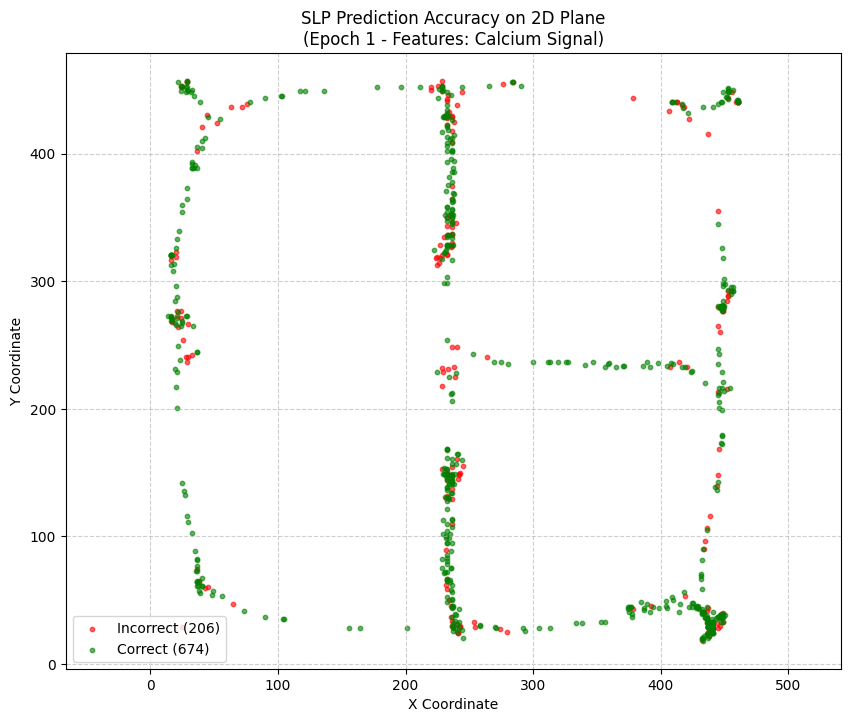

--- ✅ FINISHED: Epoch 1 using Calcium Signal ---
------------------------------------------------------------

--- 🚀 STARTING: Epoch 1 using Position Vector ---
Data Shapes: X=(4398, 2), y=(4398, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)


Training SLP for Epoch 1 with Position Vector...

SLP Test Accuracy: 0.3693

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
SLP Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        68
           2       0.00      0.00      0.00        61
           3       0.34      0.66      0.45       176
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        88
           6       0.00      0.00      0.00        61
           7       0.34      0.38      0.36       136
           8       0.42      0.77      0.55       205

    accuracy                           0.37       880
   macro avg       0.14      0.23      0.17       880
weighted avg       0.22      0.37      0.27       880

Visualizing prediction accuracy on 2D plane...


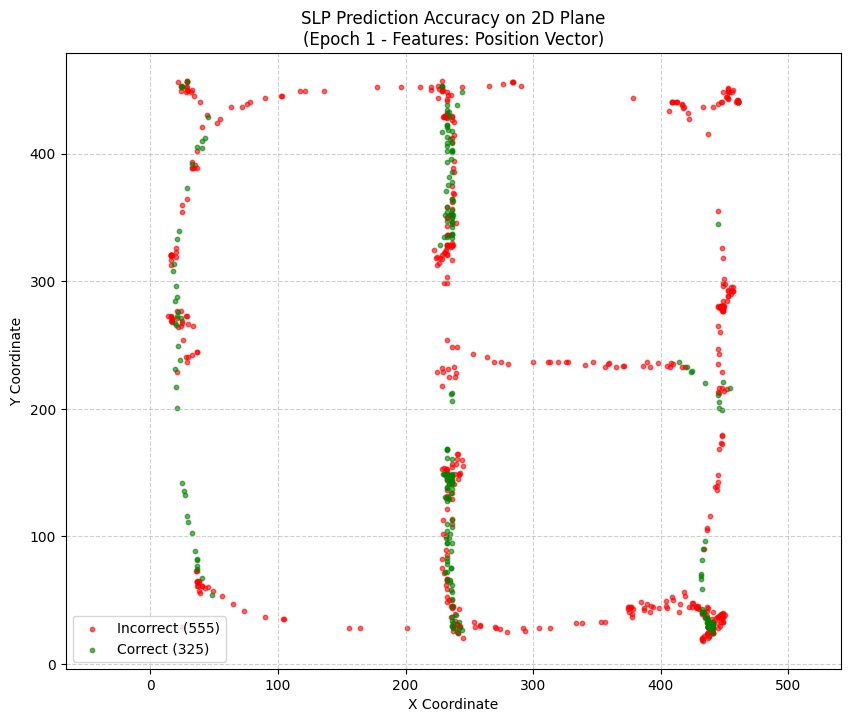

--- ✅ FINISHED: Epoch 1 using Position Vector ---
------------------------------------------------------------

--- 🚀 STARTING: Epoch 3 using Calcium Signal ---
Data Shapes: X=(10581, 148), y=(10581, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │         1,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192 (4.66 KB)

 Trainable params: 1,192 (4.66 KB)

 Non-trainable params: 0 (0.00 B)


Training SLP for Epoch 3 with Calcium Signal...

SLP Test Accuracy: 0.7426

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
SLP Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.78      0.77       248
           2       0.70      0.61      0.65       159
           3       0.73      0.79      0.76       263
           4       0.86      0.85      0.86       373
           5       0.73      0.69      0.71       256
           6       0.63      0.64      0.63       184
           7       0.72      0.75      0.74       383
           8       0.72      0.69      0.70       251

    accuracy                           0.74      2117
   macro avg       0.73      0.73      0.73      2117
weighted avg       0.74      0.74      0.74      2117

Visualizing prediction accuracy on 2D plane...


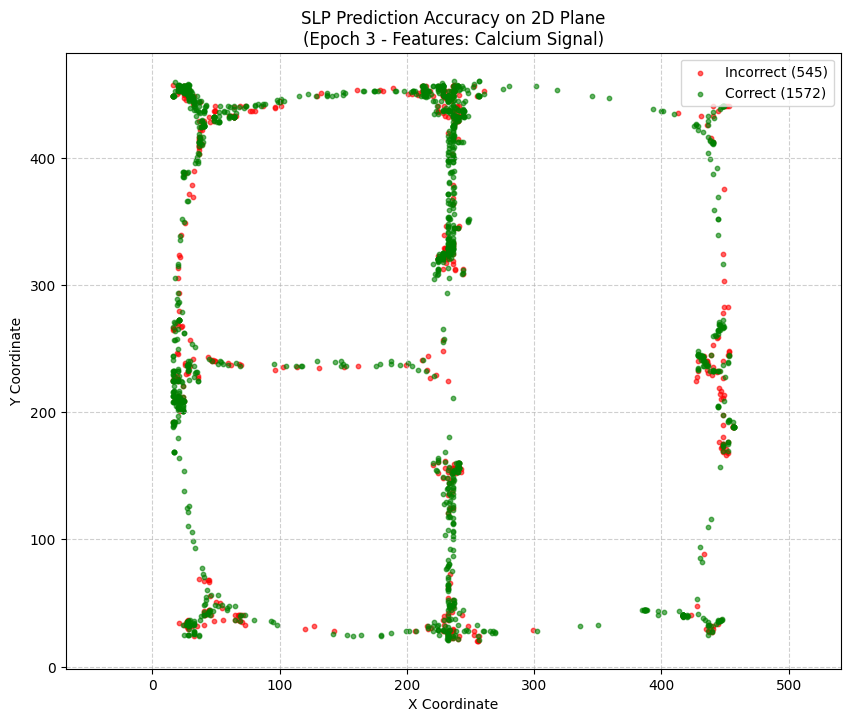

--- ✅ FINISHED: Epoch 3 using Calcium Signal ---
------------------------------------------------------------

--- 🚀 STARTING: Epoch 3 using Position Vector ---
Data Shapes: X=(10581, 2), y=(10581, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24 (96.00 B)

 Trainable params: 24 (96.00 B)

 Non-trainable params: 0 (0.00 B)


Training SLP for Epoch 3 with Position Vector...

SLP Test Accuracy: 0.2721

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
SLP Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       248
           2       0.00      0.00      0.00       159
           3       0.00      0.00      0.00       263
           4       0.31      0.82      0.45       373
           5       0.00      0.00      0.00       256
           6       0.00      0.00      0.00       184
           7       0.24      0.70      0.36       383
           8       0.00      0.00      0.00       251

    accuracy                           0.27      2117
   macro avg       0.07      0.19      0.10      2117
weighted avg       0.10      0.27      0.14      2117

Visualizing prediction accuracy on 2D plane...


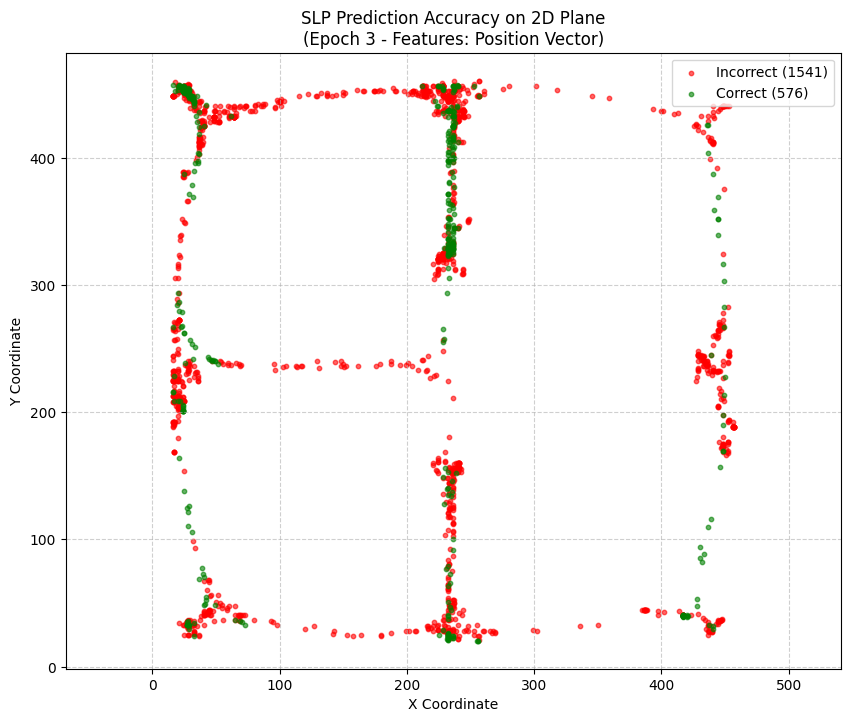

--- ✅ FINISHED: Epoch 3 using Position Vector ---
------------------------------------------------------------



In [ ]:
# ==============================================================================
# Single Cell for Model Training, Evaluation, and Visualization
# ==============================================================================
# This script trains and evaluates separate Single-Layer Perceptron (SLP) models
# for Epoch 1 and Epoch 3 data, using both calcium signals and position
# vectors as features. It then visualizes the prediction accuracy on a 2D plane.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# --- 2. LOAD AND PREPARE DATA ---
# Assume the base variables 'calcium_signal', 'coordinates', 'dirbin', and
# 'epoch_data' are already loaded in your environment.

# New variables as defined in the prompt
# Separate data for epoch 1
calcium_signal_epoch1 = calcium_signal[:, epoch_data == 1]
coordinates_epoch1 = coordinates[epoch_data == 1, :]
dirbin_epoch1 = dirbin[epoch_data == 1] # Filter target variable for epoch 1

# Separate data for epoch 3
calcium_signal_epoch3 = calcium_signal[:, epoch_data == 3]
coordinates_epoch3 = coordinates[epoch_data == 3, :]
dirbin_epoch3 = dirbin[epoch_data == 3] # Filter target variable for epoch 3

print("--- Data Shapes for Epoch 1 ---")
print(f"Shape of calcium_signal_epoch1: {calcium_signal_epoch1.shape}")
print(f"Shape of coordinates_epoch1:    {coordinates_epoch1.shape}")
print(f"Shape of dirbin_epoch1:         {dirbin_epoch1.shape}\n")

print("--- Data Shapes for Epoch 3 ---")
print(f"Shape of calcium_signal_epoch3: {calcium_signal_epoch3.shape}")
print(f"Shape of coordinates_epoch3:    {coordinates_epoch3.shape}")
print(f"Shape of dirbin_epoch3:         {dirbin_epoch3.shape}\n")
print("-" * 60, "\n")


# --- 3. REUSABLE TRAINING AND VISUALIZATION FUNCTION ---

def train_and_visualize_slp(X_full, y_raw_labels, coords_full, epoch_name, feature_type):
    """
    Trains an SLP model, evaluates it, and visualizes prediction accuracy on a 2D plane.

    Args:
        X_full (np.ndarray): Full feature dataset for the epoch (calcium or coordinates).
        y_raw_labels (np.ndarray): Raw target labels (dirbin) for the epoch.
        coords_full (np.ndarray): Full (x, y) coordinates for the epoch for visualization.
        epoch_name (str): Name of the epoch (e.g., "Epoch 1") for titles.
        feature_type (str): Name of the feature set (e.g., "Calcium Signal") for titles.
    """
    print(f"--- 🚀 STARTING: {epoch_name} using {feature_type} ---")

    # --- a. PREPARE FEATURES (X) ---
    # Transpose calcium signal data, but not coordinate data.
    if feature_type == "Calcium Signal":
        X = X_full.T  # Shape from (neurons, time) to (time, neurons)
    else:
        X = X_full # Shape is already (time, features)

    # --- b. PREPARE TARGET (y) ---
    label_encoder = LabelEncoder()
    y_labels = label_encoder.fit_transform(y_raw_labels)
    num_classes = len(label_encoder.classes_)

    if num_classes > 2:
        y = to_categorical(y_labels)
        loss_function = 'categorical_crossentropy'
    else:
        y = y_labels
        loss_function = 'binary_crossentropy'

    print(f"Data Shapes: X={X.shape}, y={y.shape}")

    # --- c. SPLIT DATA & SCALE FEATURES ---
    # We must split the coordinates along with the data to use them for plotting later.
    X_train, X_test, y_train, y_test, coords_train, coords_test = train_test_split(
        X, y, coords_full, test_size=0.2, random_state=42, stratify=y_labels
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Handle any potential NaN values that can arise from scaling
    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)


    # --- d. DEFINE AND TRAIN SLP MODEL ---
    if num_classes > 2:
        slp_model = Sequential([Dense(num_classes, activation='softmax', input_shape=(X_train_scaled.shape[1],))])
    else:
        slp_model = Sequential([Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))])

    slp_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    slp_model.summary()

    print(f"\nTraining SLP for {epoch_name} with {feature_type}...")
    history = slp_model.fit(X_train_scaled, y_train,
                            epochs=30,
                            batch_size=32,
                            validation_split=0.1,
                            verbose=0) # Set to 0 to reduce log spam

    # --- e. EVALUATE MODEL ---
    loss, accuracy = slp_model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nSLP Test Accuracy: {accuracy:.4f}\n")

    # Get predictions for the classification report
    y_pred_prob = slp_model.predict(X_test_scaled)

    if num_classes > 2:
        y_pred_labels = np.argmax(y_pred_prob, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
    else:
        y_pred_labels = (y_pred_prob > 0.5).astype("int32").flatten()
        y_test_labels = y_test

    print("SLP Classification Report:")
    target_names = [str(c) for c in label_encoder.classes_]
    print(classification_report(y_test_labels, y_pred_labels, target_names=target_names, zero_division=0))

    # --- f. VISUALIZE PREDICTIONS ON 2D COORDINATE PLANE ---
    print("Visualizing prediction accuracy on 2D plane...")
    correct_predictions = (y_pred_labels == y_test_labels)

    # Separate coordinates based on prediction correctness
    correct_coords = coords_test[correct_predictions]
    incorrect_coords = coords_test[~correct_predictions]

    plt.figure(figsize=(10, 8))
    # Plot incorrect predictions first (in red)
    plt.scatter(incorrect_coords[:, 0], incorrect_coords[:, 1],
                c='red', alpha=0.6, s=10, label=f'Incorrect ({len(incorrect_coords)})')
    # Plot correct predictions second (in green)
    plt.scatter(correct_coords[:, 0], correct_coords[:, 1],
                c='green', alpha=0.6, s=10, label=f'Correct ({len(correct_coords)})')

    plt.title(f'SLP Prediction Accuracy on 2D Plane\n({epoch_name} - Features: {feature_type})')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()
    print(f"--- ✅ FINISHED: {epoch_name} using {feature_type} ---\n{'-'*60}\n")


# --- 4. RUN EXPERIMENTS ---
# Call the function for all four scenarios.

# Scenario 1: Epoch 1, Calcium Signal
train_and_visualize_slp(
    X_full=calcium_signal_epoch1,
    y_raw_labels=dirbin_epoch1,
    coords_full=coordinates_epoch1,
    epoch_name="Epoch 1",
    feature_type="Calcium Signal"
)

# Scenario 2: Epoch 1, Position Vector
train_and_visualize_slp(
    X_full=coordinates_epoch1,
    y_raw_labels=dirbin_epoch1,
    coords_full=coordinates_epoch1,
    epoch_name="Epoch 1",
    feature_type="Position Vector"
)

# Scenario 3: Epoch 3, Calcium Signal
train_and_visualize_slp(
    X_full=calcium_signal_epoch3,
    y_raw_labels=dirbin_epoch3,
    coords_full=coordinates_epoch3,
    epoch_name="Epoch 3",
    feature_type="Calcium Signal"
)

# Scenario 4: Epoch 3, Position Vector
train_and_visualize_slp(
    X_full=coordinates_epoch3,
    y_raw_labels=dirbin_epoch3,
    coords_full=coordinates_epoch3,
    epoch_name="Epoch 3",
    feature_type="Position Vector"
)

--- Data Shapes ---
Epoch 1: Input Shape=(148, 4398), Output Shape=(4398, 2)
Epoch 3: Input Shape=(148, 10581), Output Shape=(10581, 2)

------------------------------------------------------------ 

Using device: cpu

--- 🚀 STARTING REGRESSION: Epoch 1 ---
Training Position Regressor...

Final Test MSE Loss: 77416.9597

Visualizing true vs. predicted positions...


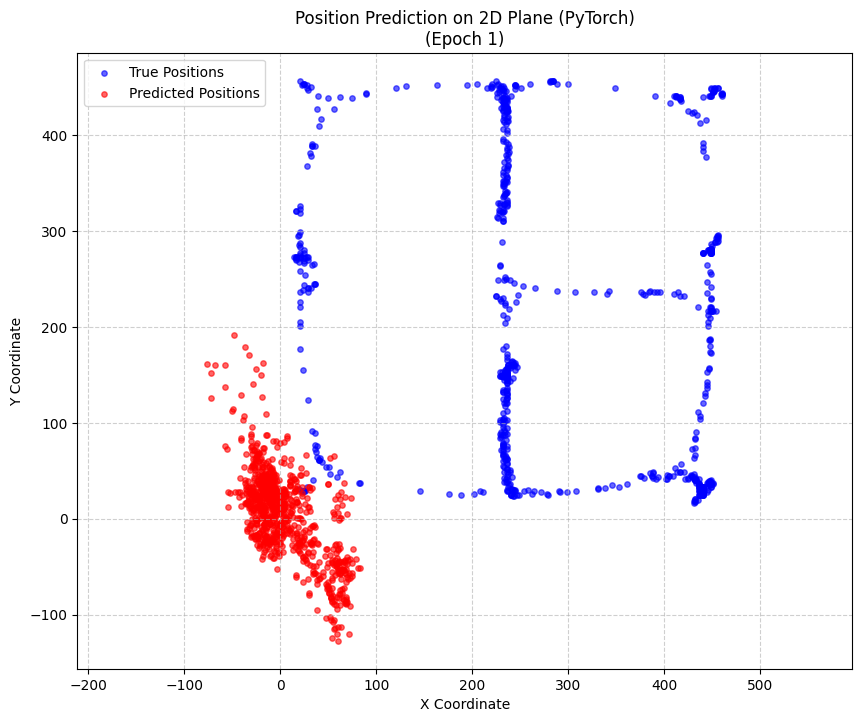

--- ✅ FINISHED: Epoch 1 ---
------------------------------------------------------------

--- 🚀 STARTING REGRESSION: Epoch 3 ---
Training Position Regressor...

Final Test MSE Loss: 70338.1279

Visualizing true vs. predicted positions...


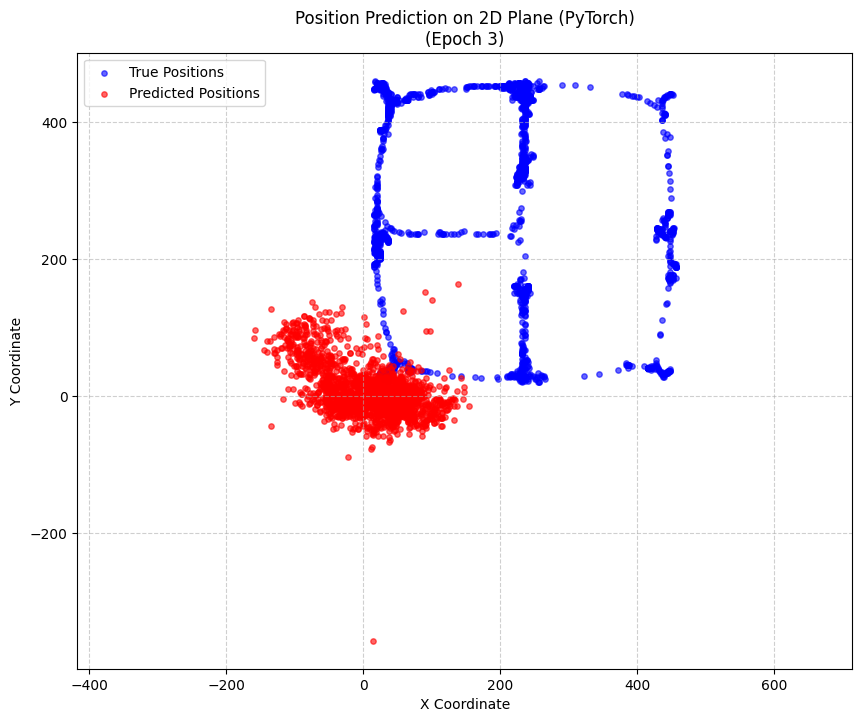

--- ✅ FINISHED: Epoch 3 ---
------------------------------------------------------------



In [ ]:
# ==============================================================================
# PyTorch REGRESSION: Predicting Position from Calcium Signal
# ==============================================================================
# This script trains a regression model to predict the (x, y) position vector
# from the calcium signal for two separate epochs.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# PyTorch Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- 2. LOAD AND PREPARE DATA ---
# Assume 'calcium_signal', 'coordinates', and 'epoch_data' are loaded.

# INPUT (X): Calcium signal for each epoch
calcium_signal_epoch1 = calcium_signal[:, epoch_data == 1]
calcium_signal_epoch3 = calcium_signal[:, epoch_data == 3]

# OUTPUT (y): Position vector for each epoch
coordinates_epoch1 = coordinates[epoch_data == 1, :]
coordinates_epoch3 = coordinates[epoch_data == 3, :]

print("--- Data Shapes ---")
print(f"Epoch 1: Input Shape={calcium_signal_epoch1.shape}, Output Shape={coordinates_epoch1.shape}")
print(f"Epoch 3: Input Shape={calcium_signal_epoch3.shape}, Output Shape={coordinates_epoch3.shape}\n")
print("-" * 60, "\n")

# --- 3. PYTORCH MODEL AND REGRESSION FUNCTION ---

# Define the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\n")

# Define the SLP model for regression (output size is 2 for x, y)
class SLP_Regressor(nn.Module):
    def __init__(self, input_size):
        super(SLP_Regressor, self).__init__()
        # The output layer must have 2 neurons to predict x and y
        self.linear = nn.Linear(input_size, 2)

    def forward(self, x):
        return self.linear(x)

def train_position_regressor(X_calcium, y_coords, epoch_name):
    """
    Trains a PyTorch SLP model for position regression and visualizes results.
    """
    print(f"--- 🚀 STARTING REGRESSION: {epoch_name} ---")

    # --- a. PREPARE FEATURES (X) AND TARGETS (y) ---
    # Transpose calcium signal to (samples, features)
    X = X_calcium.T
    y = y_coords

    # --- b. SPLIT DATA & SCALE FEATURES ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)

    # --- c. CONVERT TO TENSORS AND CREATE DATALOADERS ---
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

    # --- d. INSTANTIATE MODEL, LOSS, AND OPTIMIZER ---
    input_size = X_train_scaled.shape[1]
    model = SLP_Regressor(input_size).to(device)

    # Use Mean Squared Error for regression
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # --- e. TRAINING LOOP ---
    print("Training Position Regressor...")
    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # --- f. EVALUATION ---
    model.eval()
    total_loss = 0
    all_predictions = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            all_predictions.append(outputs.cpu())

    avg_test_loss = total_loss / len(test_loader)
    print(f"\nFinal Test MSE Loss: {avg_test_loss:.4f}\n")

    y_pred_np = torch.cat(all_predictions).numpy()

    # --- g. VISUALIZE PREDICTIONS ---
    print("Visualizing true vs. predicted positions...")
    plt.figure(figsize=(10, 8))

    # Plot the true positions from the test set
    plt.scatter(y_test[:, 0], y_test[:, 1],
                c='blue', alpha=0.6, s=15, label='True Positions')

    # Plot the model's predicted positions
    plt.scatter(y_pred_np[:, 0], y_pred_np[:, 1],
                c='red', alpha=0.6, s=15, label='Predicted Positions')

    plt.title(f'Position Prediction on 2D Plane (PyTorch)\n({epoch_name})')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()
    print(f"--- ✅ FINISHED: {epoch_name} ---\n{'-'*60}\n")

# --- 4. RUN EXPERIMENTS ---

# Experiment 1: Predict Position for Epoch 1
train_position_regressor(
    X_calcium=calcium_signal_epoch1,
    y_coords=coordinates_epoch1,
    epoch_name="Epoch 1"
)

# Experiment 2: Predict Position for Epoch 3
train_position_regressor(
    X_calcium=calcium_signal_epoch3,
    y_coords=coordinates_epoch3,
    epoch_name="Epoch 3"
)

--- Data Shapes ---
Epoch 1: Input Shape=(148, 4398), Output Shape=(4398, 2)
Epoch 2: Input Shape=(148, 5610), Output Shape=(5610, 2)
Epoch 3: Input Shape=(148, 10581), Output Shape=(10581, 2)

------------------------------------------------------------ 

Using device: cpu

--- 🚀 STARTING MLP REGRESSION: Epoch 1 ---
Training Position Regressor...

Final Test MSE Loss: 333.3510

Visualizing true vs. predicted positions with temporal coloring...


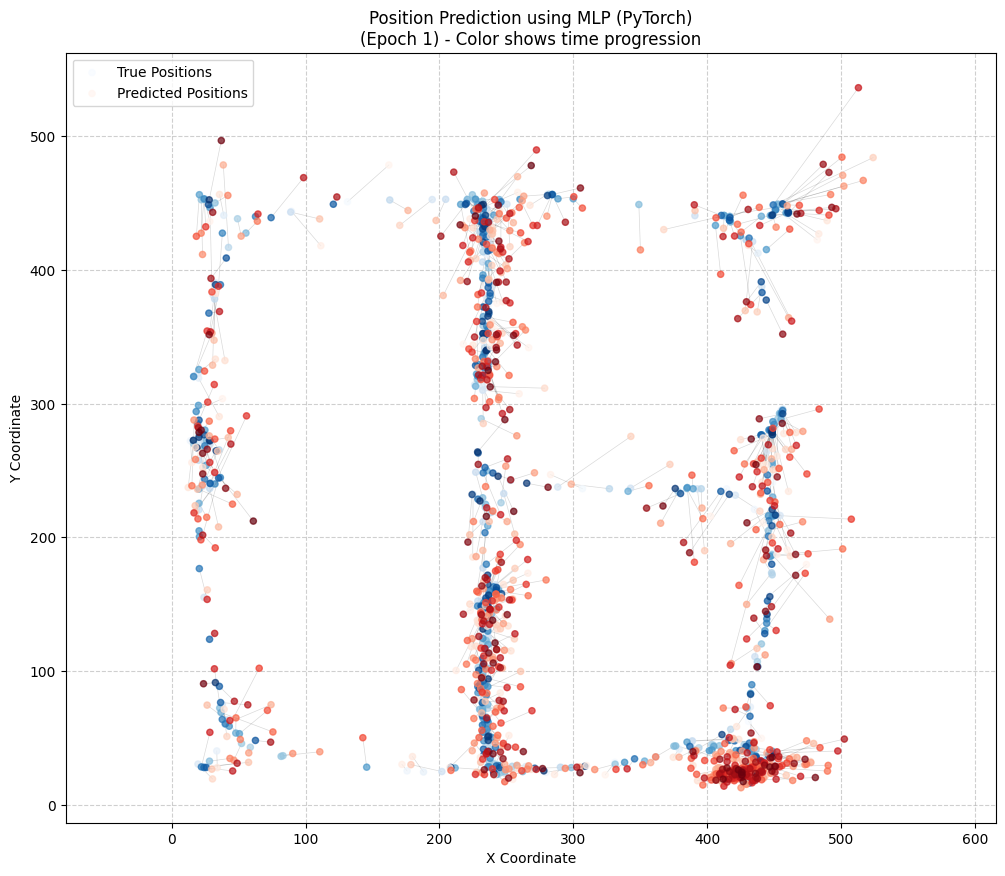

--- ✅ FINISHED: Epoch 1 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 2 ---
Training Position Regressor...

Final Test MSE Loss: 215.8814

Visualizing true vs. predicted positions with temporal coloring...


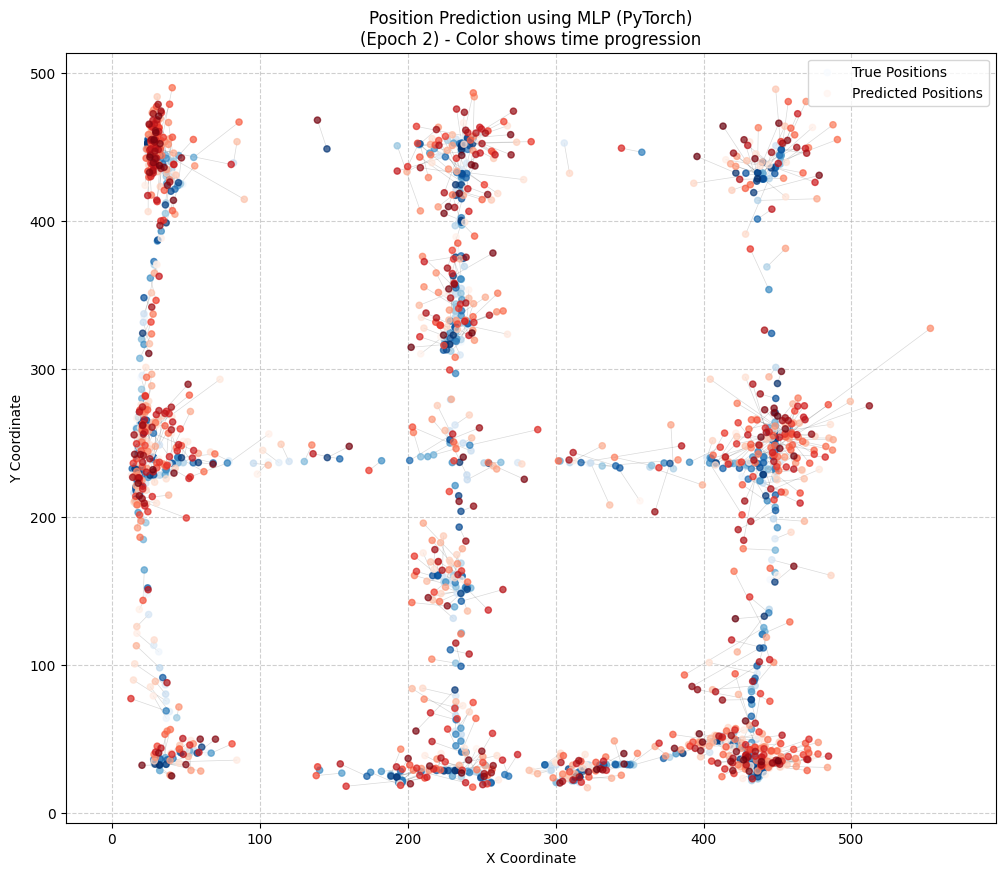

--- ✅ FINISHED: Epoch 2 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 3 ---
Training Position Regressor...

Final Test MSE Loss: 159.1598

Visualizing true vs. predicted positions with temporal coloring...


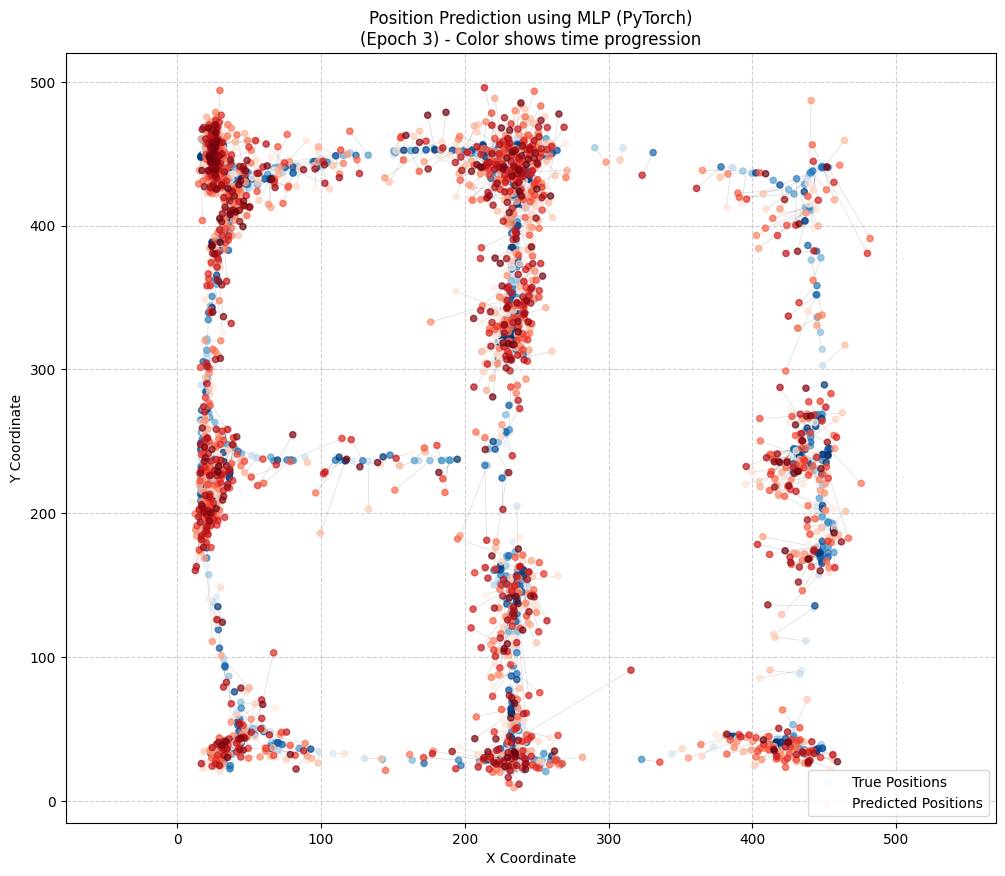

--- ✅ FINISHED: Epoch 3 ---
------------------------------------------------------------



In [ ]:
# ==============================================================================
# PyTorch REGRESSION with MLP: Predicting Position from Calcium Signal
# ==============================================================================
# This script uses a Multi-Layer Perceptron (MLP) to learn the non-linear
# relationship between calcium signals and the (x, y) position vector.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# PyTorch Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- 2. LOAD AND PREPARE DATA ---
# Assume 'calcium_signal', 'coordinates', and 'epoch_data' are loaded.

# INPUT (X): Calcium signal for each epoch
calcium_signal_epoch1 = calcium_signal[:, epoch_data == 1]
calcium_signal_epoch2 = calcium_signal[:, epoch_data == 2]
calcium_signal_epoch3 = calcium_signal[:, epoch_data == 3]

# OUTPUT (y): Position vector for each epoch
coordinates_epoch1 = coordinates[epoch_data == 1, :]
coordinates_epoch2 = coordinates[epoch_data == 2, :] # Corrected assignment for Epoch 2
coordinates_epoch3 = coordinates[epoch_data == 3, :]

print("--- Data Shapes ---")
print(f"Epoch 1: Input Shape={calcium_signal_epoch1.shape}, Output Shape={coordinates_epoch1.shape}")
print(f"Epoch 2: Input Shape={calcium_signal_epoch2.shape}, Output Shape={coordinates_epoch2.shape}")
print(f"Epoch 3: Input Shape={calcium_signal_epoch3.shape}, Output Shape={coordinates_epoch3.shape}\n")
print("-" * 60, "\n")

# --- 3. PYTORCH MODEL AND REGRESSION FUNCTION ---

# Define the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\n")

# Define the MLP model for regression with hidden layers
class MLP_Regressor(nn.Module):
    def __init__(self, input_size):
        super(MLP_Regressor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),  # Non-linear activation function
            nn.Linear(512, 256),
            nn.ReLU(),  # Non-linear activation function
            nn.Linear(256, 128),
            nn.ReLU(),  # Non-linear activation function
            nn.Linear(128, 2)  # Output layer predicts 2 values (x, y)
        )

    def forward(self, x):
        return self.network(x)

def train_position_regressor(X_calcium, y_coords, epoch_name):
    """
    Trains a PyTorch MLP model for position regression and visualizes results.
    """
    print(f"--- 🚀 STARTING MLP REGRESSION: {epoch_name} ---")

    # --- a. PREPARE FEATURES (X) AND TARGETS (y) ---
    X = X_calcium.T
    y = y_coords

    # --- b. SPLIT DATA & SCALE FEATURES ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)


    # --- c. CONVERT TO TENSORS AND CREATE DATALOADERS ---
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

    # --- d. INSTANTIATE MODEL, LOSS, AND OPTIMIZER ---
    input_size = X_train_scaled.shape[1]
    # *** Use the new MLP_Regressor model ***
    model = MLP_Regressor(input_size).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # --- e. TRAINING LOOP ---
    print("Training Position Regressor...")
    num_epochs = 30
    for epoch in range(num_epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # --- f. EVALUATION ---
    model.eval()
    total_loss = 0
    all_predictions = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            all_predictions.append(outputs.cpu())

    avg_test_loss = total_loss / len(test_loader)
    print(f"\nFinal Test MSE Loss: {avg_test_loss:.4f}\n")

    y_pred_np = torch.cat(all_predictions).numpy()

    # --- g. VISUALIZE PREDICTIONS ---
    print("Visualizing true vs. predicted positions with temporal coloring...")
    plt.figure(figsize=(12, 10))

    # Create a sequence of numbers to map to the colormap, representing time
    time_indices = np.arange(len(y_test))

    # Draw faint lines connecting true points to their predictions
    for i in range(len(y_test)):
        plt.plot([y_test[i, 0], y_pred_np[i, 0]],
                 [y_test[i, 1], y_pred_np[i, 1]],
                 'k-', alpha=0.15, linewidth=0.5)

    # Plot the true positions from the test set with a blue color gradient
    plt.scatter(y_test[:, 0], y_test[:, 1],
                c=time_indices, cmap='Blues',
                alpha=0.7, s=20, label='True Positions', zorder=2)

    # Plot the model's predicted positions with a red color gradient
    plt.scatter(y_pred_np[:, 0], y_pred_np[:, 1],
                c=time_indices, cmap='Reds',
                alpha=0.7, s=20, label='Predicted Positions', zorder=3)

    plt.title(f'Position Prediction using MLP (PyTorch)\n({epoch_name}) - Color shows time progression')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axis('equal')
    plt.show()
    print(f"--- ✅ FINISHED: {epoch_name} ---\n{'-'*60}\n")

# --- 4. RUN EXPERIMENTS ---

# Experiment 1: Predict Position for Epoch 1
train_position_regressor(
    X_calcium=calcium_signal_epoch1,
    y_coords=coordinates_epoch1,
    epoch_name="Epoch 1"
)

# Experiment 2: Predict Position for Epoch 2
train_position_regressor(
    X_calcium=calcium_signal_epoch2,
    y_coords=coordinates_epoch2,
    epoch_name="Epoch 2"
)

# Experiment 3: Predict Position for Epoch 3
train_position_regressor(
    X_calcium=calcium_signal_epoch3,
    y_coords=coordinates_epoch3,
    epoch_name="Epoch 3"
)

In [ ]:
# Separate data where start is 0
calcium_signal_start0 = calcium_signal[:, start == 0]
coordinates_start0 = coordinates[start == 0, :]
epoch_data_start0 = epoch_data[start == 0]
dirbin_start0 = dirbin[start == 0]
timestamps_start0 = timestamps[:, start == 0]
head_orientation_start0 = head_orientation[:, start == 0]
dirvec_start0 = dirvec[start == 0, :]
posvec_start0 = posvec[start == 0, :]

print("--- Data Shapes for start == 0 ---")
print(f"Shape of calcium_signal_start0: {calcium_signal_start0.shape}")
print(f"Shape of coordinates_start0:    {coordinates_start0.shape}")
print(f"Shape of epoch_data_start0:     {epoch_data_start0.shape}")
print(f"Shape of dirbin_start0:         {dirbin_start0.shape}")
print(f"Shape of timestamps_start0:     {timestamps_start0.shape}")
print(f"Shape of head_orientation_start0: {head_orientation_start0.shape}")
print(f"Shape of dirvec_start0:         {dirvec_start0.shape}")
print(f"Shape of posvec_start0:         {posvec_start0.shape}\n")


# Separate data where start is 1
calcium_signal_start1 = calcium_signal[:, start == 1]
coordinates_start1 = coordinates[start == 1, :]
epoch_data_start1 = epoch_data[start == 1]
dirbin_start1 = dirbin[start == 1]
timestamps_start1 = timestamps[:, start == 1]
head_orientation_start1 = head_orientation[:, start == 1]
dirvec_start1 = dirvec[start == 1, :]
posvec_start1 = posvec[start == 1, :]


print("--- Data Shapes for start == 1 ---")
print(f"Shape of calcium_signal_start1: {calcium_signal_start1.shape}")
print(f"Shape of coordinates_start1:    {coordinates_start1.shape}")
print(f"Shape of epoch_data_start1:     {epoch_data_start1.shape}")
print(f"Shape of dirbin_start1:         {dirbin_start1.shape}")
print(f"Shape of timestamps_start1:     {timestamps_start1.shape}")
print(f"Shape of head_orientation_start1: {head_orientation_start1.shape}")
print(f"Shape of dirvec_start1:         {dirvec_start1.shape}")
print(f"Shape of posvec_start1:         {posvec_start1.shape}\n")

--- Data Shapes for start == 0 ---
Shape of calcium_signal_start0: (148, 42976)
Shape of coordinates_start0:    (42976, 2)
Shape of epoch_data_start0:     (42976,)
Shape of dirbin_start0:         (42976,)
Shape of timestamps_start0:     (1, 42976)
Shape of head_orientation_start0: (1, 42976)
Shape of dirvec_start0:         (42976, 8)
Shape of posvec_start0:         (42976, 3)

--- Data Shapes for start == 1 ---
Shape of calcium_signal_start1: (148, 972)
Shape of coordinates_start1:    (972, 2)
Shape of epoch_data_start1:     (972,)
Shape of dirbin_start1:         (972,)
Shape of timestamps_start1:     (1, 972)
Shape of head_orientation_start1: (1, 972)
Shape of dirvec_start1:         (972, 8)
Shape of posvec_start1:         (972, 3)



--- Running Regression for Epochs and Start Conditions ---
--- 🚀 STARTING MLP REGRESSION: Epoch 1, Start 0 ---
Training Position Regressor...

Final Test MSE Loss: 345.9090

Visualizing true vs. predicted positions with temporal coloring...


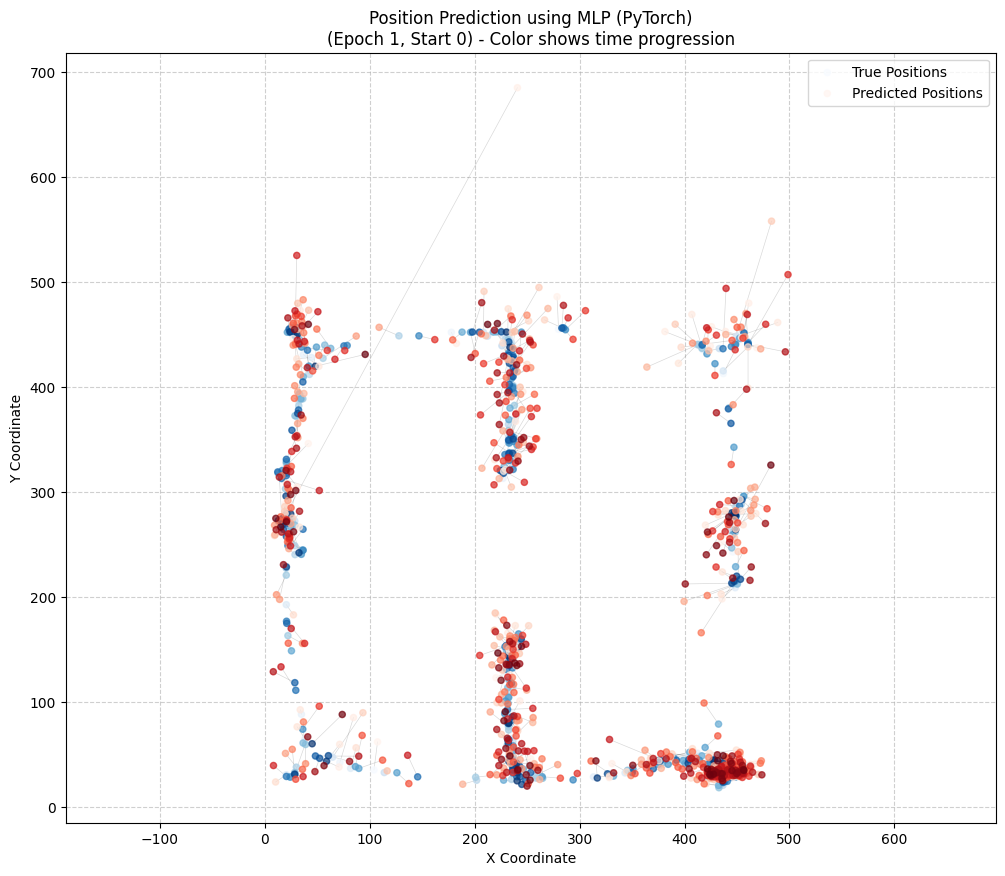

--- ✅ FINISHED: Epoch 1, Start 0 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 1, Start 1 ---
Training Position Regressor...

Final Test MSE Loss: 454.6710

Visualizing true vs. predicted positions with temporal coloring...


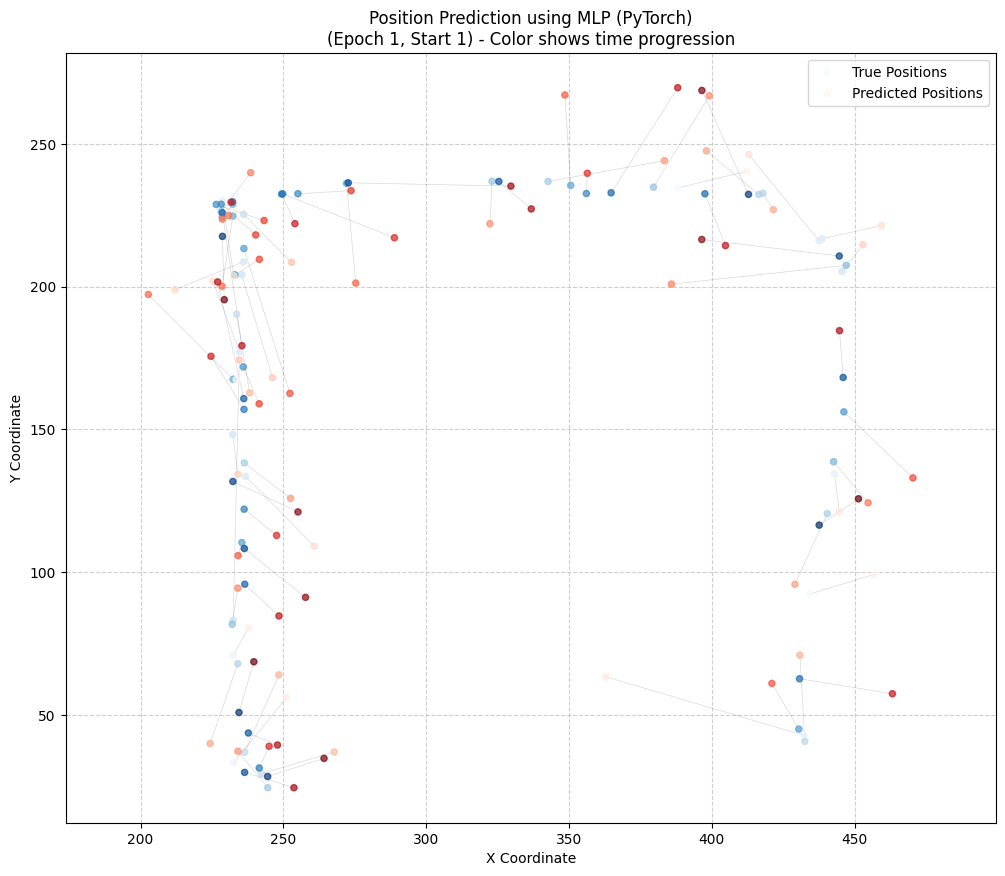

--- ✅ FINISHED: Epoch 1, Start 1 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 2, Start 0 ---
Training Position Regressor...

Final Test MSE Loss: 260.6839

Visualizing true vs. predicted positions with temporal coloring...


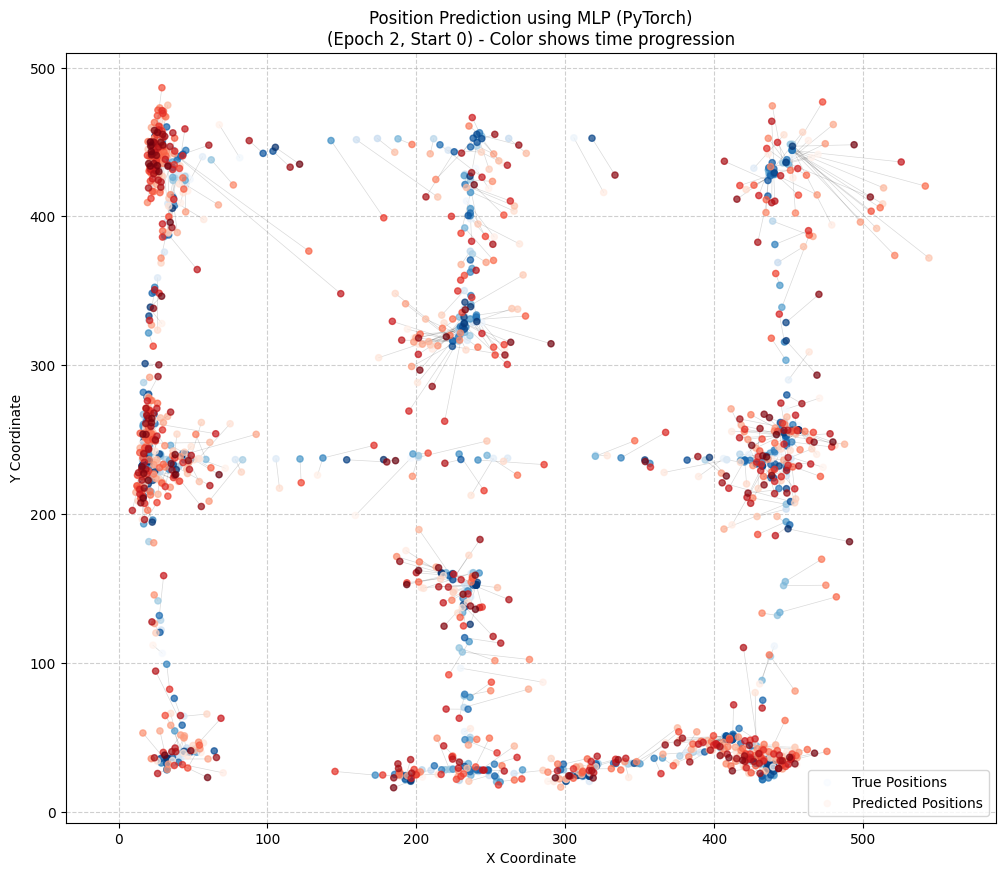

--- ✅ FINISHED: Epoch 2, Start 0 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 2, Start 1 ---
Training Position Regressor...

Final Test MSE Loss: 3050.9915

Visualizing true vs. predicted positions with temporal coloring...


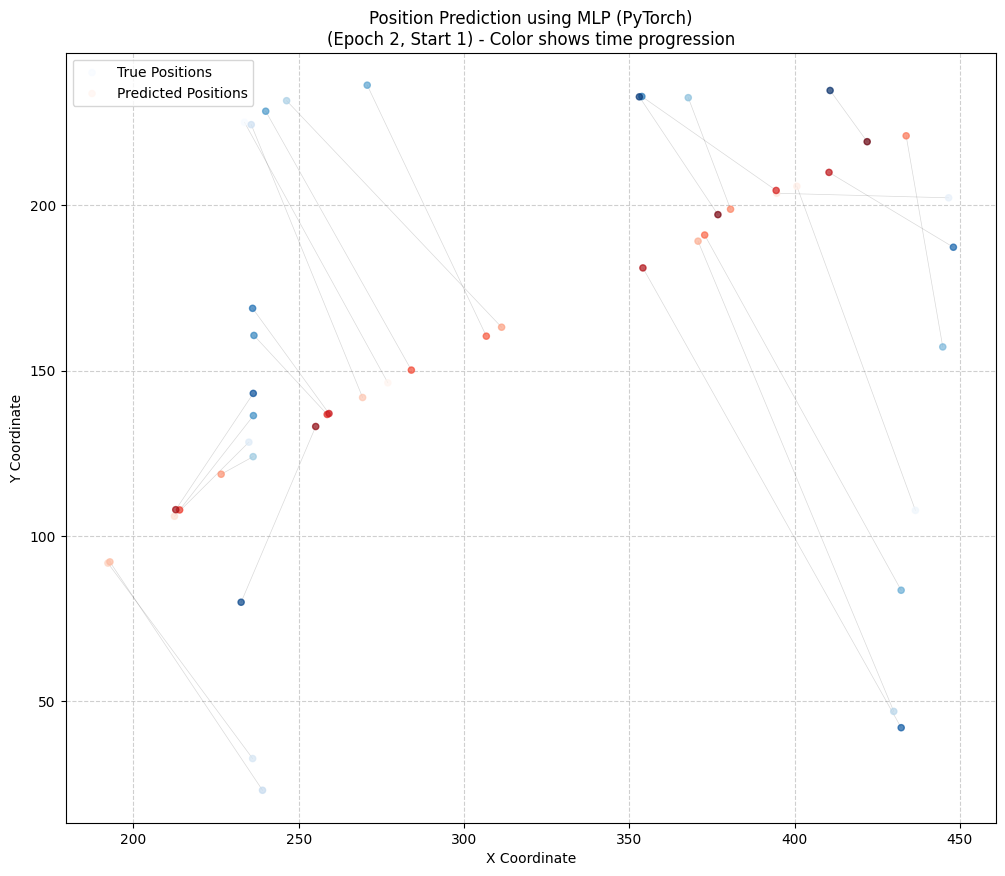

--- ✅ FINISHED: Epoch 2, Start 1 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 3, Start 0 ---
Training Position Regressor...

Final Test MSE Loss: 169.9103

Visualizing true vs. predicted positions with temporal coloring...


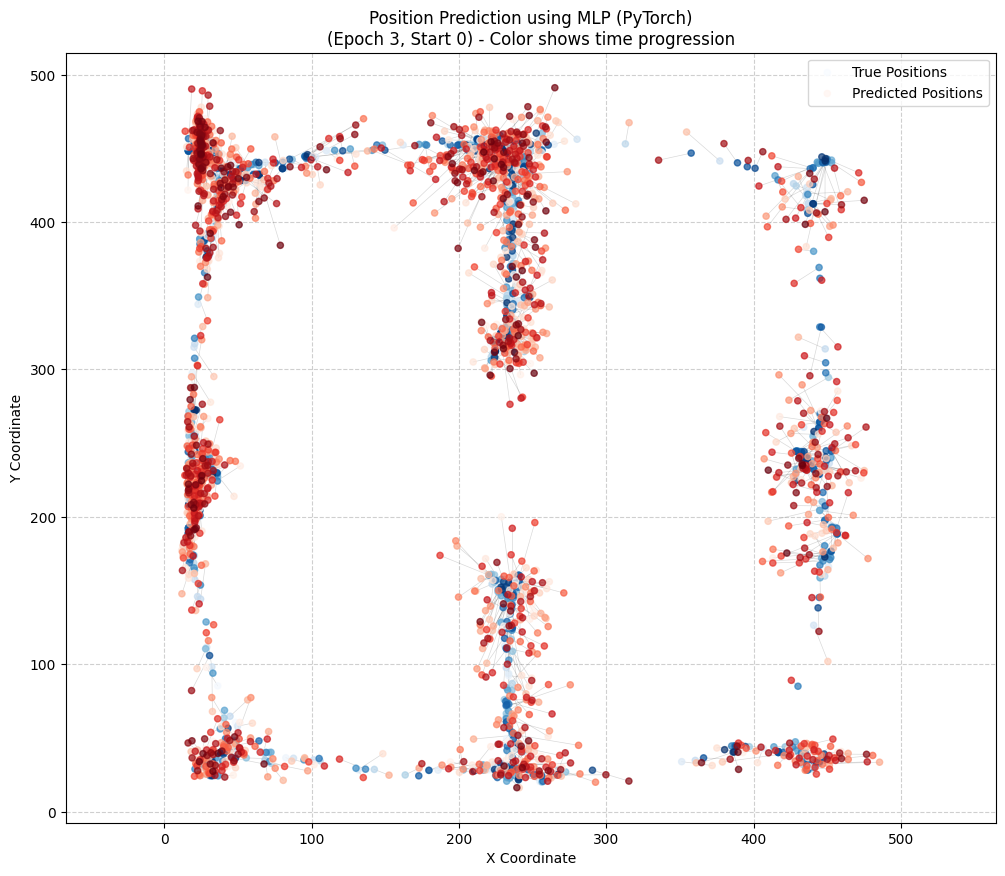

--- ✅ FINISHED: Epoch 3, Start 0 ---
------------------------------------------------------------

--- 🚀 STARTING MLP REGRESSION: Epoch 3, Start 1 ---
Training Position Regressor...

Final Test MSE Loss: 201.3086

Visualizing true vs. predicted positions with temporal coloring...


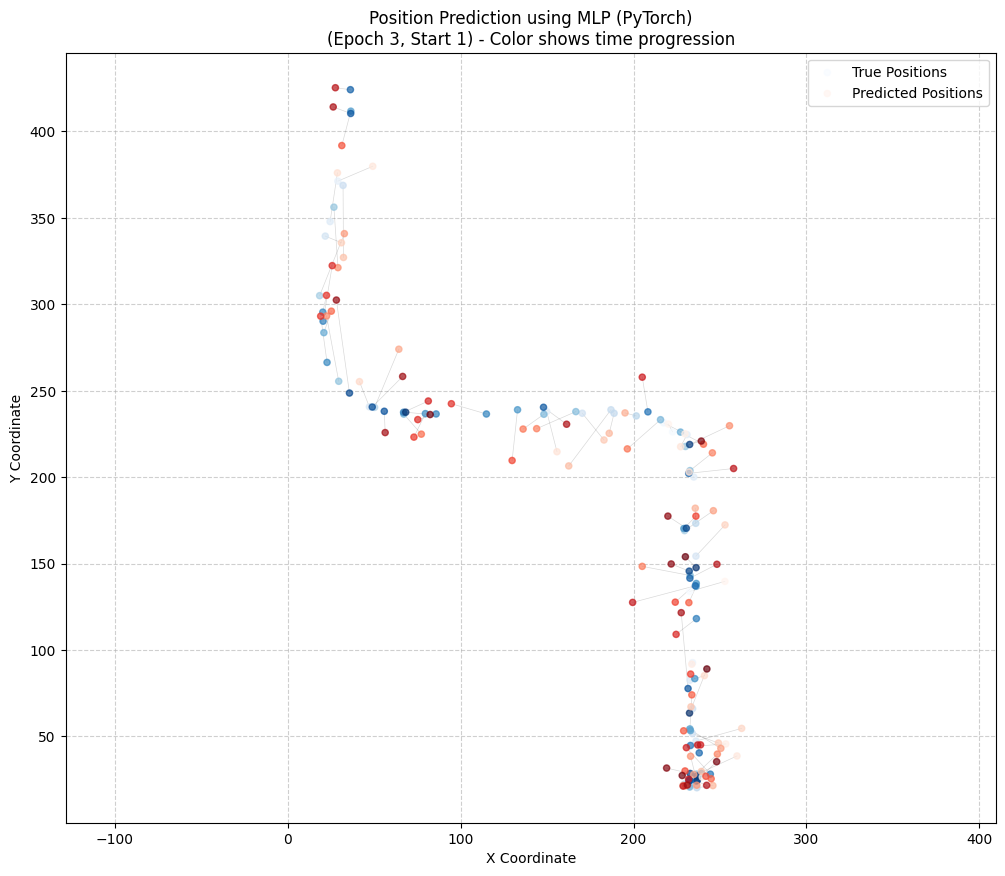

--- ✅ FINISHED: Epoch 3, Start 1 ---
------------------------------------------------------------



In [ ]:
# --- 4. RUN EXPERIMENTS for Epochs and Start ---

print("--- Running Regression for Epochs and Start Conditions ---")

# Define the combinations of epoch data and start conditions
epoch_start_combinations = [
    (calcium_signal_epoch1, coordinates_epoch1, epoch_data_start0, 'Epoch 1, Start 0'), # Need to filter by start == 0
    (calcium_signal_epoch1, coordinates_epoch1, epoch_data_start1, 'Epoch 1, Start 1'), # Need to filter by start == 1
    (calcium_signal_epoch2, coordinates_epoch2, epoch_data_start0, 'Epoch 2, Start 0'), # Need to filter by start == 0
    (calcium_signal_epoch2, coordinates_epoch2, epoch_data_start1, 'Epoch 2, Start 1'), # Need to filter by start == 1
    (calcium_signal_epoch3, coordinates_epoch3, epoch_data_start0, 'Epoch 3, Start 0'), # Need to filter by start == 0
    (calcium_signal_epoch3, coordinates_epoch3, epoch_data_start1, 'Epoch 3, Start 1'), # Need to filter by start == 1
]

# Iterate through combinations and train the regressor
for calcium_data, coord_data, epoch_subset, name in epoch_start_combinations:
    # Need to filter calcium_data and coord_data based on the current epoch_subset
    # The existing epoch_data_start0 and epoch_data_start1 variables already have the correct time points
    # based on the 'start' variable. We now need to further filter based on the epoch value within those subsets.

    if 'Start 0' in name:
        # Filter data where start is 0 AND the epoch matches the current epoch
        current_epoch = int(name.split(' ')[1].strip(','))
        filter_indices = (epoch_data_start0 == current_epoch)
        filtered_calcium = calcium_signal_start0[:, filter_indices]
        filtered_coords = coordinates_start0[filter_indices, :]
        current_name = f"Epoch {current_epoch}, Start 0"

    elif 'Start 1' in name:
        # Filter data where start is 1 AND the epoch matches the current epoch
        current_epoch = int(name.split(' ')[1].strip(','))
        filter_indices = (epoch_data_start1 == current_epoch)
        filtered_calcium = calcium_signal_start1[:, filter_indices]
        filtered_coords = coordinates_start1[filter_indices, :]
        current_name = f"Epoch {current_epoch}, Start 1"
    else:
         # If the name doesn't match expected format, skip or handle appropriately
         print(f"Skipping unexpected combination name: {name}")
         continue


    if filtered_calcium.shape[1] > 0: # Ensure there are data points for this combination
        train_position_regressor(
            X_calcium=filtered_calcium,
            y_coords=filtered_coords,
            epoch_name=current_name # Use the correctly formatted name
        )
    else:
        print(f"No data points found for {current_name}. Skipping regression.")